# Music Genre Prediction

# FIRST METHOD: Voluntary Data Cleaning and Preprocessing

## 1. Data Cleaning

In [1]:
import pandas as pd
music_df = pd.read_csv("music_genre.csv")

# Null data count
null_data = music_df.isna().sum().sort_values()
print("Null data: {}" .format(null_data))

Null data: instance_id         5
obtained_date       5
tempo               5
speechiness         5
mode                5
loudness            5
liveness            5
key                 5
instrumentalness    5
energy              5
duration_ms         5
danceability        5
acousticness        5
popularity          5
track_name          5
artist_name         5
valence             5
music_genre         5
dtype: int64


### From the null data calculations, we can find that the dataset has 5 null values in all columns. These null values will hinder the accuracy prediction results. So, we will remove all these null rows of the dataset. 

In [2]:
music_df = music_df.dropna()
music_df.isna().sum().sort_values()

instance_id         0
obtained_date       0
tempo               0
speechiness         0
mode                0
loudness            0
liveness            0
key                 0
instrumentalness    0
energy              0
duration_ms         0
danceability        0
acousticness        0
popularity          0
track_name          0
artist_name         0
valence             0
music_genre         0
dtype: int64

## The important factors for genre prediction.

- A music genre is a conventional category that identifies some pieces of music as belonging to a shared tradition or set of conventions.

- These conventions when broken down, can consists of various factors such as **tempo**, **mode**, **key**, **dancebility** which works as building blocks. And depending upon these building blocks a song's genre is predicted. 

The above dataset, it consists of song's artistic data as well as audio profile data.
|  Audio Profile  |  Artist Data  |
|-----------------|---------------|
|  tempo          |  artist_name  |
|  danceability   |  track_name   |
|  energy         |  duration_ms  |
|  acousticness   |  obtained_date|
|  liveness       |  instance_id  |
|  music_genre    |  key          |
|                 |  mode         |
|                 |  speechiness  |
|                 |  loudness     |
|                 |  instrumentalness |
|                 |  popularity   |
|                 |  valence      |

**As we are predicting the genre of the song, we need only audio profile data and drop the rest of the columns.**

In [3]:
music_audio_df = music_df.drop(["artist_name", "track_name", "duration_ms", "obtained_date", "instance_id", "key", "mode", "speechiness", "loudness", "instrumentalness", "popularity", "valence"], axis = 1)
music_audio_df

,acousticness,danceability,energy,liveness,tempo,music_genre
0,0.00468,0.652,0.941,0.115,100.889,Electronic
1,0.01270,0.622,0.890,0.124,115.00200000000001,Electronic
2,0.00306,0.620,0.755,0.534,127.994,Electronic
3,0.02540,0.774,0.700,0.157,128.014,Electronic
4,0.00465,0.638,0.587,0.157,145.036,Electronic
...,...,...,...,...,...,...
50000,0.03340,0.913,0.574,0.119,98.02799999999999,Hip-Hop
50001,0.15700,0.709,0.362,0.109,122.04299999999999,Hip-Hop
50002,0.00597,0.693,0.763,0.143,131.079,Hip-Hop
50003,0.08310,0.782,0.472,0.106,75.88600000000001,Hip-Hop


- After more analyzation, we can find that the column "tempo" consists of value = **?** which may hamper the model fit and prediction. So, we will drop them from the dataset.

In [4]:
music_audio_df.drop(music_audio_df[music_audio_df['tempo'] == '?'].index, inplace = True)
music_audio_df

,acousticness,danceability,energy,liveness,tempo,music_genre
0,0.00468,0.652,0.941,0.115,100.889,Electronic
1,0.01270,0.622,0.890,0.124,115.00200000000001,Electronic
2,0.00306,0.620,0.755,0.534,127.994,Electronic
3,0.02540,0.774,0.700,0.157,128.014,Electronic
4,0.00465,0.638,0.587,0.157,145.036,Electronic
...,...,...,...,...,...,...
50000,0.03340,0.913,0.574,0.119,98.02799999999999,Hip-Hop
50001,0.15700,0.709,0.362,0.109,122.04299999999999,Hip-Hop
50002,0.00597,0.693,0.763,0.143,131.079,Hip-Hop
50003,0.08310,0.782,0.472,0.106,75.88600000000001,Hip-Hop


### Now the dataset is clean and subset into a new one consisting of important factors fro the prediction of song genre.

## 2. Data Preprocessing

Now we will transform the complex data into a more simpler one.

From the obtained cleaned dataset "music_audio_df" we can see that the column genre has varieties of values 

In [5]:
genres_list = music_audio_df['music_genre'].unique()
genres_list

array(['Electronic', 'Anime', 'Jazz', 'Alternative', 'Country', 'Rap',
       'Blues', 'Rock', 'Classical', 'Hip-Hop'], dtype=object)

As, the column "music_genre" has categorical values so it will be difficult for the model to process, fit and oredict the results.

To overcome that, we will convert them into binary values **0** or **1** commonly known as **dummy variables**. 

In [6]:
# Creating dummy variables

music_dummies = pd.get_dummies(music_audio_df["music_genre"], drop_first = True)
music_dummies

,Anime,Blues,Classical,Country,Electronic,Hip-Hop,Jazz,Rap,Rock
0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,1,0,0,0,0
2,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
50000,0,0,0,0,0,1,0,0,0
50001,0,0,0,0,0,1,0,0,0
50002,0,0,0,0,0,1,0,0,0
50003,0,0,0,0,0,1,0,0,0


In [7]:
# Concatenation to original dataframe

music_dummies = pd.concat([music_audio_df, music_dummies], axis = 1)

In [8]:
# Remove the categorical value column "music_genre"

music_dummies = music_dummies.drop("music_genre", axis = 1)

**Now, we have got the workable dataframe i.e., "music_dummies" to perform fit and predict results.**

- ## Is it "Rock" or not??

**Here, we will predict the songs by its factors, whether it is "Rock" or not.**

For that, we need to:
1. Create Features
2. Create Variables
3. Choose model to fit 
4. Predict results to test dataset
5. Compute Accuracy
6. Amplifying the model with various statistical methods.

**Here, we will drop all those columns except the factors and the precdiction constant**.

In [9]:
# music_dummies_rock = music_dummies.drop(["Anime", "Blues", "Classical", "Country", "Electronic", "Hip-Hop", "Jazz", "Rap"], axis = 1)

### A. Create Features
We will work on the music_dummies_rock dataframe.
For the prediction of a factor we need to create features which would help in detecting the results based on the stattistics of those features. 

Here features will be:
- acousticness
- danceability
- energy
- liveness
- tempo

### B. Target 
Our target constant for the prediction will be the column "Rock".

### C. Choose model to fit
As the dataframe we have created i.e., "music_dummies_rock" is of classification type (having binary values), we would choose a **Logistic Regression** model.

#### Fitting With Logistic Regression Model

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Create Features
X = music_dummies.drop("Rock", axis = 1).values

# Create Target
y = music_dummies["Rock"].values

# Instantiating train_test_split and model fit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# Classification Report
logreg_report = classification_report(y_test, y_pred)
print("Report: \n", logreg_report)

Report: 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      8088
           1       0.56      0.40      0.47       916

    accuracy                           0.91      9004
   macro avg       0.75      0.68      0.71      9004
weighted avg       0.90      0.91      0.90      9004



From the above classification report, it is concluded that:
1. The model has a high precision score, recall and f1-score for **not Rock** and an average of **48% for Rock songs**.
2. Due to having more amout of not rock songs compared to rock songs the result looks a bit skewed.<br />

## 3. Accuracy of Model

In [11]:
# Accuracy Score
from sklearn.metrics import accuracy_score

logreg_accuracy_score = accuracy_score(y_test, y_pred)
print("Accuracy score: {}" .format(logreg_accuracy_score))

Accuracy score: 0.9075966237227898


**With the help of K-Fold Cross Validation, we will evaluate the model's performance**.

In [12]:
# Model Performance Score
import numpy as np
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(10)
logreg_score = cross_val_score(logreg, X, y, cv=kf)
print("Model performance score: {}" .format(np.mean(logreg_score)))

Model performance score: 0.7765437583296313


### Insights:<br />
- **The model showed 90.7% accuracy**.<br />
- **The model performance score is 77.6%.** <br />
- **The results show that the accuracy of the model is very accurate while the performance is comparatively low, so increasing the model performance can make it an achievable prediction model**.

#### Fitting With Decision Tree Model

In [13]:
from sklearn.tree import DecisionTreeClassifier

# Instantiating DecisionTreeClassifier and model fit
dt = DecisionTreeClassifier(max_depth= 10, random_state= 42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Classification Report
dt_report = classification_report(y_test, y_pred)
print("Report: \n", dt_report)

Report: 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      8088
           1       0.56      0.40      0.47       916

    accuracy                           0.91      9004
   macro avg       0.75      0.68      0.71      9004
weighted avg       0.90      0.91      0.90      9004



In [14]:
# Accuracy Score
dt_accuracy_score = accuracy_score(y_test, y_pred)
print("Accuracy score: {}" .format(dt_accuracy_score))

Accuracy score: 0.9075966237227898


In [15]:
# Model performance score
kf = KFold(10)
dt_score = cross_val_score(dt, X, y, cv=kf)
print("Model performance score: {}" .format(np.mean(dt_score)))

Model performance score: 0.30681919147045755


### Insights:<br />
- **The model showed 90.7% accuracy**.<br />
- **The model performance score is 30.68%.** <br />
- **The results show that the accuracy of the model is very accurate while the performance is very low, so increasing the model performance nearly close to accuracy score can make it an achievable prediction model**.

### From the above results, we can conclude that:
**1. Logistic Regression and Decision Tree has the exact same report.**<br />
**2. The accuracy score of Logistic Regression and Decision Tree model is same.**<br />
**3. Both the insights do not give a clear picture about the true performance of the model.**<br />
**4. Logistic Regression and Decision Tree model has a higher model performance score of 77.6% and low score of 30.68% respectively**.<br />

# SECOND METHOD: Scaling, PCA analysis and Balancing of data

Here, we will work with the null cleaned original dataframe "music_df".<br />
On this new model we will work on:
1. Computing correlation of different factors in audio data
2. Scaling the data
3. PCA analysis 
4. Balancing of data
5. Model Creation

From the "music_df" we will remove the artist data (categorical values) which are not important factors for the genre prediction:
- instance_id
- artist_name
- track_name
- popularity
- duration_ms
- key
- loudness
- mode
- obtained_date

In [16]:
music_binvalues = music_df.drop(["instance_id", "artist_name", "track_name", "popularity", "duration_ms", "key", "loudness", "mode", "obtained_date"], axis = 1)

In [17]:
music_binvalues.drop(music_binvalues[music_binvalues['tempo'] == '?'].index, inplace = True)

### 1. Computing Correlation

In [18]:
corr_metrics = music_binvalues.corr()
corr_metrics.style.background_gradient()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence
acousticness,1.000000,-0.349019,-0.790731,0.390010,-0.108187,-0.165213,-0.272745
danceability,-0.349019,1.000000,0.264175,-0.299755,-0.052700,0.281113,0.433316
energy,-0.790731,0.264175,1.000000,-0.391222,0.186015,0.158485,0.397014
instrumentalness,0.390010,-0.299755,-0.391222,1.000000,-0.093945,-0.199144,-0.272099
liveness,-0.108187,-0.052700,0.186015,-0.093945,1.000000,0.113494,0.049305
speechiness,-0.165213,0.281113,0.158485,-0.199144,0.113494,1.000000,0.060172
valence,-0.272745,0.433316,0.397014,-0.272099,0.049305,0.060172,1.000000


From the above correlation matrix, we found a few significance with **valence and danceability**, **valence and energy** and **instrumentalness and acousticness**. <br />
But the significance values doe not provide any string conclusion about it, so we dont need to consider it as its negligible.

In the **"First Method: Voluntary data cleaning and preprocessing"** we have noticed that, the classification report provided a disproportion in prediction leading to model skewing.

To avoid that we can balance our filtered dataset to have equal weights on both the sides.

## 2. Balancing the data

In [19]:
rock_only = music_binvalues.loc[music_binvalues['music_genre'] == 'Rock']
not_rock = music_binvalues.loc[music_binvalues['music_genre'] != 'Rock']

# subset only the not rock songs, and taking a sample the same size as there are rock songs
not_rock = not_rock.sample(rock_only.shape[0], random_state=10)

# Creating a single dataframe
balanced_df = pd.concat([not_rock, rock_only])

## 3. Deciding number of n_components

In [20]:
X_bal = balanced_df.drop("music_genre", axis = 1)
y_bal = balanced_df["music_genre"]

X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_bal, y_bal, test_size = 0.2, random_state = 42)

In [21]:
# Finding number of n_components
# Importing StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train_bal)
scaled_X_test = scaler.transform(X_test_bal)

# Importing PCA
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(scaled_X_train)
exp_variance = pca.explained_variance_ratio_

## 4. Visualizing through cumuative explained variance plot

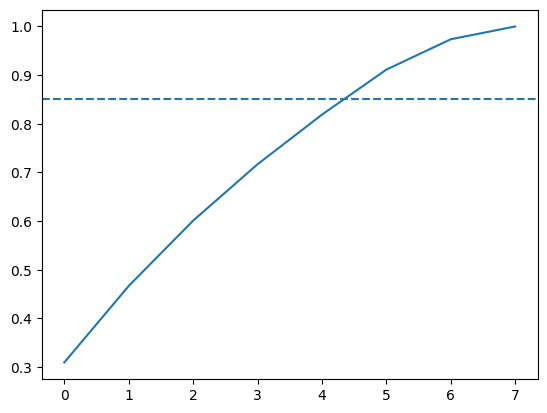

In [22]:
import matplotlib.pyplot as plt
# Calculate the cumulative explained variance
cum_exp_variance = np.cumsum(exp_variance)

# Plot the cumulative explained variance and draw a dashed line at 0.85.
fig, ax = plt.subplots()
ax.plot(cum_exp_variance)
ax.axhline(y=0.85, linestyle='--')

- **The intersection shows the number of n_components to be taken.**
**As 85% variance shows at n_components approximately 4.2, so we can take n_component = 5**

In [23]:
pca_new = PCA(n_components= 5)
train_pca = pca_new.fit_transform(scaler.fit_transform(X_train_bal))
test_pca = pca_new.fit_transform(scaler.fit_transform(X_test_bal))

## 5. Checking Classification Report

In [24]:
# Checking Model Perfomance 
# Train our decision tree on the balanced data
tree = DecisionTreeClassifier(random_state=10)
tree.fit(train_pca, y_train_bal)
pred_labels_tree = tree.predict(test_pca)

# Train our logistic regression on the balanced data
logreg = LogisticRegression(random_state=10)
logreg.fit(train_pca, y_train_bal)
pred_labels_logit = logreg.predict(test_pca)

# compare the models
print("Decision Tree: \n", classification_report(y_test_bal, pred_labels_tree))
print("Logistic Regression: \n", classification_report(y_test_bal, pred_labels_logit))

Decision Tree: 
               precision    recall  f1-score   support

 Alternative       0.12      0.11      0.11       109
       Anime       0.11      0.12      0.12        89
       Blues       0.06      0.09      0.08        98
   Classical       0.58      0.56      0.57        93
     Country       0.09      0.09      0.09       108
  Electronic       0.12      0.11      0.11       113
     Hip-Hop       0.25      0.25      0.25       106
        Jazz       0.15      0.12      0.13       114
         Rap       0.21      0.32      0.25        87
        Rock       0.58      0.54      0.56       908

    accuracy                           0.36      1825
   macro avg       0.23      0.23      0.23      1825
weighted avg       0.38      0.36      0.37      1825

Logistic Regression: 
               precision    recall  f1-score   support

 Alternative       0.00      0.00      0.00       109
       Anime       0.00      0.00      0.00        89
       Blues       0.00      0.00     

**From the above classification report, we can see that most of the precision results for the genres it showed poor results.**

### Creating pipeline and computing model performance

In [25]:
# Creatin pipeline
from sklearn.pipeline import Pipeline
tree_pipe = Pipeline([("scaler", StandardScaler()), ("pca_new", PCA(n_components=5)), 
                      ("tree", DecisionTreeClassifier(random_state=10))])
logreg_pipe = Pipeline([("scaler", StandardScaler()), ("pca_new", PCA(n_components=5)), 
                        ("logreg", LogisticRegression(random_state=10))])

# Set up our K-fold cross-validation
kf = KFold(10)

# Train our models using KFold cv
tree_score = cross_val_score(tree_pipe, X_bal, y_bal, cv=kf)
logit_score = cross_val_score(logreg_pipe, X_bal, y_bal, cv=kf)

# Print the mean of each array of scores
print("Decision Tree:", np.mean(tree_score), '\n' "Logistic Regression:", np.mean(logit_score))

Decision Tree: 0.354669995772564 
Logistic Regression: 0.5582976643415769


**From the above results, we can conclude that the model with taking all the audio data as input did not performed well when processed through scaling and PCA analysis**.<br />
- **Logistic Regression got 55.83% model performance**
- **Decision Tree got 35.46% model performance**